# Figure 1

In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import utils
from scipy.io import wavfile
from scipy.stats import zscore
from mne_bids import read_raw_bids, BIDSPath
from nilearn.plotting import plot_markers

# Audio wave

In [4]:
fs, audio = wavfile.read('../dataset/stimuli/sub-01/audio/sub-01_task-conversation_audio.wav')
fs, audio.shape

(44100, (74039733,))

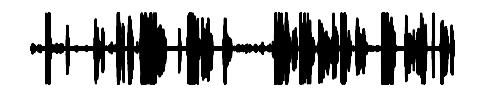

In [5]:
skip_sec = 475 #np.random.randint(len(audio)//fs)
skip_sec = 410
take_sec = 60

fig, ax = plt.subplots(figsize=(6, 1))
ax.plot(audio[skip_sec*fs:skip_sec*fs+take_sec*fs], c='k')#, alpha=0.5)
ax.set_axis_off()
# fig.savefig('audio_sample.svg', bbox_inches='tight', dpi=300)
plt.show()

# Neural waves

In [ ]:
path = BIDSPath(subject='01', task='conversation', datatype='ieeg', root='../dataset')
raw = read_raw_bids(path, verbose=False)
raw.load_data()
data = raw._data
data2 = zscore(data, axis=1)
fs = int(raw.info['sfreq'])
data2.shape

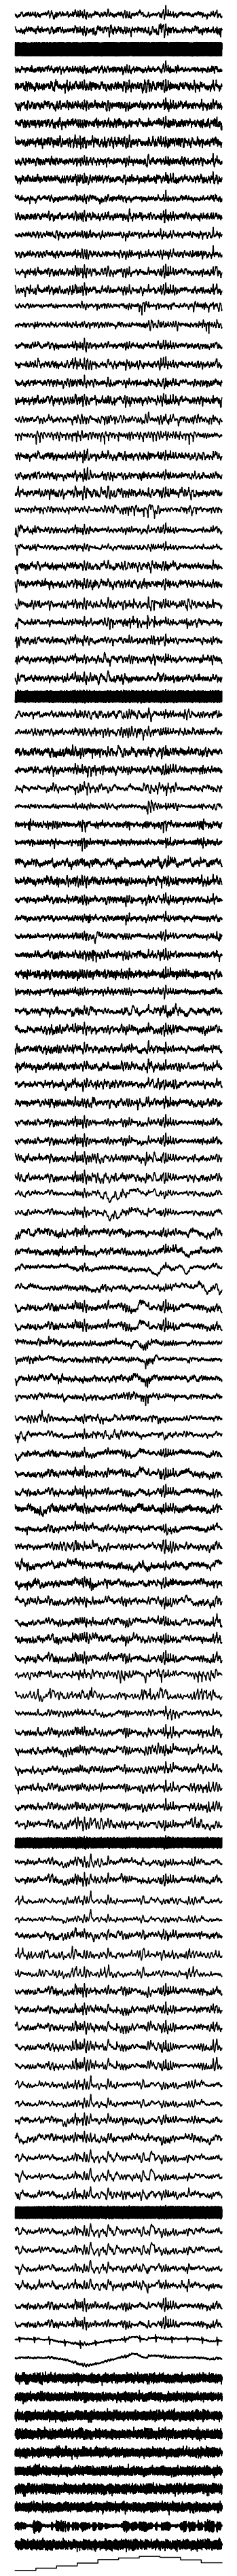

In [ ]:
# elec = np.random.randint(data.shape[0])

skip_sec = np.random.randint(data.shape[1]//fs)
skip_sec = 410
take_sec = 10

n = len(data2)
fig, axes = plt.subplots(n, 1, figsize=(6, n*.5))
for i in range(n):
    axes[i].plot(data2[i, skip_sec*fs:skip_sec*fs+take_sec*fs], c='k')
    axes[i].set_axis_off()
fig.savefig('elec_sample.svg', bbox_inches='tight', dpi=300)
plt.show()

# glass brain electrodes

Opening raw data file ../dataset/derivatives/preprocessed/sub-06/fastica/sub-06_task-conversation_desc-highgamma_ieeg.fif...
    Range : 0 ... 730623 =      0.000 ...  1426.998 secs
Ready.


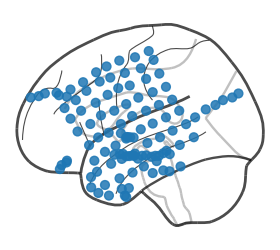

In [22]:
sub, label, num = 6, "blue", 0
raw = utils.getraw(sub, root='../dataset/')
coords, elecs = utils.getcoords(raw)

cmap = mpl.colors.ListedColormap(sns.color_palette().as_hex())
plot_markers(
    np.ones(len(coords)) * num,
    coords,
    display_mode="l",
    colorbar=False,
    node_cmap=cmap,
    alpha=0.85,
    node_vmin=0,
    node_vmax=9,
    node_size=40,
)
# plt.savefig(f"{outdir}/fig1-brain-{label}.svg")
plt.show()

Opening raw data file ../dataset/derivatives/preprocessed/sub-11/fastica/sub-11_task-conversation_desc-highgamma_ieeg.fif...
    Range : 0 ... 1333247 =      0.000 ...  2603.998 secs
Ready.


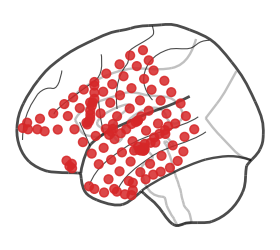

In [21]:
sub, label, num = 11, 'red', 3
raw = utils.getraw(sub, root='../dataset/')
coords, elecs = utils.getcoords(raw)

cmap = mpl.colors.ListedColormap(sns.color_palette().as_hex())
plot_markers(
    np.ones(len(coords)) * num,
    coords,
    display_mode="l",
    colorbar=False,
    node_cmap=cmap,
    alpha=0.85,
    node_vmin=0,
    node_vmax=9,
    node_size=40,
)
# plt.savefig(f"{outdir}/fig1-brain-{label}.svg")
plt.show()